<a href="https://colab.research.google.com/github/TemitopeJoseph/Data-Analysis/blob/main/Crime_Analysis_(EDA1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysing Crime Rate In Los Angelese**

Project on Exploratory Data Analysis.

Data source : kaggle

Explore the dataset on crimes  by answering the following questions.

1. Which hour has the highest frequency of crimes?

2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

3. Identify the number of crimes committed against victims of different age groups.



In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import the csv file

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/crimes.csv')

In [ ]:
# view the dataset on crimes
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [ ]:
# view general info concerning the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB


form the summary of the dataset,it is found that only the weapon description column is empty which signifies that there is no much information concerning the weapon used in the crime. This column is not really important for the analysis, we are only to explore the crime rate, location and time.

In [ ]:
df.shape

(185715, 12)

**The Dataset contains 185715 records (rows) and 12 fields (columns)**

## summarizing the data on important columns

In [ ]:
df['Vict Sex'].value_counts()

,count
Vict Sex,
M,93008
F,89854
X,2812
H,30


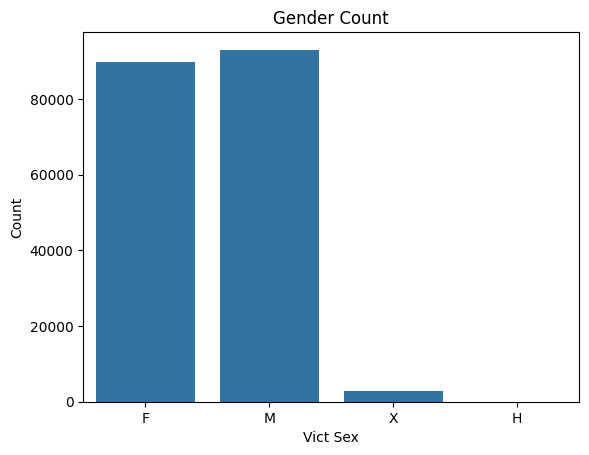

In [ ]:
# visualize the gender count using pie chart with value as percent
sns.countplot(x='Vict Sex', data=df)
plt.title('Gender Count')
plt.ylabel('Count')
plt.show()

**Supprising!!!. male are the highest victim of crimes in los Angeles.**  

In [ ]:
df['Vict Descent'].value_counts()

,count
Vict Descent,
H,74128
W,44985
B,34931
O,16331
A,5519
X,4548
K,1389
F,1228
C,1210


In [ ]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

**1. Which hour has the highest frequency of crimes?**

convert the column to datetime column in form of hours:Min

In [ ]:
# obtain the column for the hours
df['hour_of_crime']= pd.to_datetime(df['TIME OCC'], format='%H%M', errors='coerce').dt.hour
df['hour_of_crime'].value_counts().sort_values()

,count
hour_of_crime,
1.0,1023
2.0,1426
5.0,3593
4.0,3893
3.0,5359
7.0,5403
6.0,5621
9.0,7092
8.0,7523


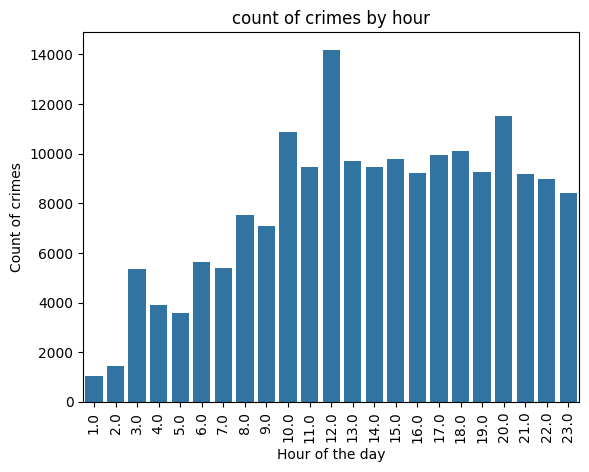

In [ ]:
# visualise the frequency of crimes per hour
sns.countplot(x='hour_of_crime', data=df)
plt.title( 'count of crimes by hour')
plt.xlabel('Hour of the day')
plt.ylabel('Count of crimes')
plt.xticks(rotation=90)
plt.show()

Hence, we most crimes occurs aroud 12pm.

**2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?**

Night crimes are crimes that occurs between the hours of 22.00 to 3.00

In [ ]:
# create a list containing night hours
Night_hours = [22,23,0,1,2,3]
# subset crimes that occur in the night hours as night_ crimes
night_crimes = df[df['hour_of_crime'].isin(Night_hours)]
# group the night crimes by area
night_crimes_by_area = night_crimes.groupby('AREA NAME').size().reset_index(name='count')
# sort the night_crimes in desecending order
night_crimes_by_area = night_crimes_by_area.sort_values(by='count', ascending=False)
# select location / area with the highest crimes
night_crimes_by_area = night_crimes_by_area.iloc[0]
night_crimes_by_area

,1
AREA NAME,Central
count,2194


In [ ]:
print(f'the areas with the highes crime rate are {night_crimes_by_area[0]} having crime count of {night_crimes_by_area[1]}')

the areas with the highes crime rate are Central having crime count of 2194


3. Identify the number of crimes committed against victims of different age groups.

In [ ]:
# Create bins of age group
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
# create labels of each bins
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
# add a new column to the datafram containing the new bins age bracket
df['age_group'] = pd.cut(df['Vict Age'], bins=age_bins, labels=age_labels)
# count the age_group
victims_by_age_group = df.groupby('age_group').size().reset_index(name='count')
victims_by_age_group

,age_group,count
0,0-17,4528
1,18-25,28291
2,26-34,47470
3,35-44,42157
4,45-54,28353
5,55-64,20169
6,65+,14747


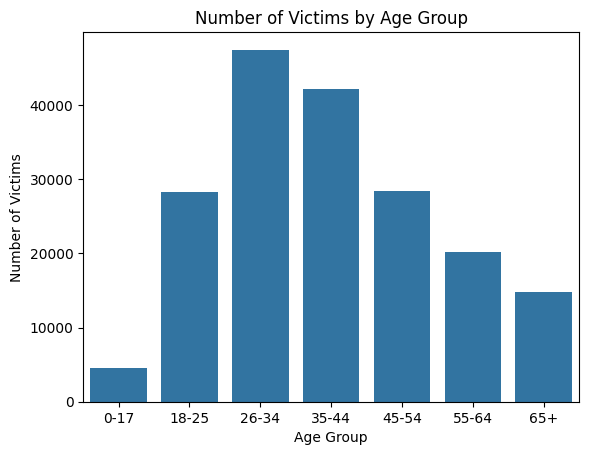

In [ ]:
# show the datframe above in a plot a barplot
sns.barplot(x='age_group', y='count', data=victims_by_age_group)
plt.title('Number of Victims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Victims')
plt.show()

**There is low crimes among children as this as the lowest number of crimes but the government needs to pay more attention to it yous as young adults as this has the highest number of crime inthe country.**